##                                                     **KPMG Data Analytics Virtual Internship Project**

--------------------------------------------------------------------------------

### **This analysis consists of three tasks.**
* Data Quality Assessment 
* Data Presentation
* Data Insights


In [6]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import numpy as np
import os
import math
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stat
import datetime as dt
import seaborn as sb
import seaborn as sns
import squarify 
import matplotlib.pyplot as plt
 
%matplotlib inline
from datetime import datetime
import squarify
import json




In [9]:
import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

**Task 1: Data Quality Assessment**

In [10]:
df=pd.read_excel('raw_data_set_customer.xlsx',sheet_name='Transactions')
df1=pd.read_excel('raw_data_set_customer.xlsx',sheet_name='NewCustomerList')
df2=pd.read_excel('raw_data_set_customer.xlsx',sheet_name='CustomerDemographic')
df3=pd.read_excel('raw_data_set_customer.xlsx',sheet_name='CustomerAddress')

<ipython-input-10-827ce969493e>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df1=pd.read_excel('raw_data_set_customer.xlsx',sheet_name='NewCustomerList')
<ipython-input-10-827ce969493e>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df2=pd.read_excel('raw_data_set_customer.xlsx',sheet_name='CustomerDemographic')


In [11]:
new_data=pd.merge(df2, df3, on=['customer_id'])
new_data1 = pd.merge(new_data, df, on=['customer_id'])

In [12]:
new_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [13]:
new_data1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [14]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19326 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   DOB                                  19522 non-null  datetime64[ns]
 6   job_title                            17589 non-null  object        
 7   job_industry_category                16746 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  object        
 10  default   

In [15]:
new_data1.drop('default',axis=1, inplace=True)

In [16]:
new_data1.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19522.000000,19968.000000,19968.000000,19968.000000,19968.000000,19609.000000,19968.000000,19773.000000,19773.000000
mean,1740.254307,48.757412,10.681949,2987.623347,7.516376,9997.846504,45.365986,0.500688,1107.780004,556.091050,38198.741364
std,1009.819066,28.611359,5.674631,851.306647,2.824783,5773.929973,30.750115,0.500012,582.852548,405.966472,2874.856871
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38216.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [17]:
new_data1.duplicated().sum()

0

In [18]:
new_data1.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                           

In [19]:
new_data1['product_first_sold_date'] = np.array(new_data1['product_first_sold_date'], dtype='float64')
new_data1['product_first_sold_date']=pd.to_datetime(new_data1['product_first_sold_date'],unit='ns')

In [20]:
new_data1.standard_cost.mean()

556.0910499165528

In [21]:
new_data1['standard_cost'].fillna(new_data1['standard_cost'].mean(), inplace=True)

In [22]:
new_data1['product_first_sold_date'].fillna(method='ffill', inplace=True)

In [23]:
new_data1['DOB'] = new_data1['DOB'].apply(pd.to_datetime)

In [24]:
new_data1['DOB'].fillna(method='ffill', inplace=True)

In [25]:
date = datetime.now().strftime(format='%x')
new_data1['Age'] = new_data1['DOB'].apply(lambda x: len(pd.date_range(start = x, end = date, freq='Y')))

In [26]:
new_data1 = new_data1[new_data1.Age<100]

In [27]:
new_data1['transaction_month'] = pd.DatetimeIndex(new_data1['DOB']).month
new_data1['profit'] = new_data1['list_price'] - new_data1['standard_cost']
new_data1['recent_purchase_date'] = pd.DatetimeIndex(new_data1['transaction_date']).date

<ipython-input-27-82538420bfbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data1['transaction_month'] = pd.DatetimeIndex(new_data1['DOB']).month
<ipython-input-27-82538420bfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data1['profit'] = new_data1['list_price'] - new_data1['standard_cost']
<ipython-input-27-82538420bfbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [28]:
new_data1['gender']=new_data1['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified').replace('Mela','Male')

new_data1['state']=new_data1['state'].replace('New South Wales','NSW').replace('Victoria','VIC')

In [29]:
new_data1['profit'].sum()

11010821.36631619

**Task 2: RFM Analysis (Recency, Frequency, Monetary)**

In [30]:
new_data1['transaction_date'].max()
comprision_data = dt.date(2017,12,30)
rfm_df= new_data1.groupby('customer_id',as_index=False).agg({'recent_purchase_date': lambda date: (comprision_data - date.max()).days,
                                        'transaction_id': lambda num: len(num),
                                        'profit': lambda price: price.sum()})

rfm_df.columns=['customer_id','Recency','Frequency','Monetary']
rfm_df['Recency'] = rfm_df['Recency'].astype(int)
rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,1,7,11,3018.09
1,2,128,3,2226.26
2,4,195,2,220.57
3,5,16,6,2394.94
4,6,64,5,3946.55


In [32]:
rfm=rfm_df
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,1,7,11,3018.09
1,2,128,3,2226.26
2,4,195,2,220.57
3,5,16,6,2394.94
4,6,64,5,3946.55


In [33]:
#RFM Scores
#qcut() is Quantile-based discretization function.
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 5, ['5','4','3','2','1'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 5, ['1','2','3','4','5' ])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 5, ['1','2','3','4','5'])
rfm.head()

,customer_id,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
0,1,7,11,3018.09,5,5,3
1,2,128,3,2226.26,1,1,2
2,4,195,2,220.57,1,1,1
3,5,16,6,2394.94,4,3,2
4,6,64,5,3946.55,2,2,4


In [34]:
rfm.info()                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3488 entries, 0 to 3487
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   customer_id  3488 non-null   int64   
 1   Recency      3488 non-null   int64   
 2   Frequency    3488 non-null   int64   
 3   Monetary     3488 non-null   float64 
 4   r_quartile   3488 non-null   category
 5   f_quartile   3488 non-null   category
 6   m_quartile   3488 non-null   category
dtypes: category(3), float64(1), int64(3)
memory usage: 120.0 KB


In [35]:
#Calculating combination of rfm values=RFM_score

rfm['RFM_Values'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)


# Calculate RFM_Score ( here it is important to convert category values to int values)

rfm['RFM_Score'] = rfm[[('r_quartile'),('f_quartile'),('m_quartile')]].astype(int).sum(axis=1)
rfm.head()

,customer_id,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Values,RFM_Score
0,1,7,11,3018.09,5,5,3,553,13
1,2,128,3,2226.26,1,1,2,112,4
2,4,195,2,220.57,1,1,1,111,3
3,5,16,6,2394.94,4,3,2,432,9
4,6,64,5,3946.55,2,2,4,224,8


In [36]:
# Filter out best cusotmers
rfm[rfm['RFM_Values']=='555'].sort_values('Monetary', ascending=False).head()

,customer_id,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Values,RFM_Score
1549,1558,8,9,10640.30000,5,5,5,555,15
723,729,1,10,10497.78000,5,5,5,555,15
316,322,1,12,10341.57000,5,5,5,555,15
3220,3232,8,13,8903.62000,5,5,5,555,15
2849,2860,8,10,8670.16895,5,5,5,555,15


In [37]:
# Filter out worst customers
rfm[rfm["RFM_Values"] == "111"].sort_values('Monetary', ascending=False).head()

,customer_id,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Values,RFM_Score
201,207,279,3,1630.03,1,1,1,111,3
616,622,266,3,1627.69,1,1,1,111,3
567,573,105,2,1618.83,1,1,1,111,3
1482,1491,160,3,1591.33,1,1,1,111,3
546,552,159,4,1577.70,1,1,1,111,3


In [38]:
#customer segments

seg_map = {
    r'[1-2][1-2]':'Lost Customer',
    r'[1-2][3-4]': 'High Risk Customer',
    r'[1-2]5': 'Losing Customer',
    r'3[1-2]': 'Late Bloomer',
    r'33': 'Potential Customer',
    r'[3-4][4-5]': 'Becoming Loyal',
    r'41': 'Loyal Customers',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Very Loyal',
    r'5[4-5]':'Platinum Customer'
}

rfm['Score'] = 'Green'
rfm.loc[rfm['RFM_Score']>5,'Score'] = 'Bronze' 
rfm.loc[rfm['RFM_Score']>7,'Score'] = 'Silver' 
rfm.loc[rfm['RFM_Score']>9,'Score'] = 'Gold' 
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Platinum'

In [39]:
rfm['Customer_Segmentation'] = rfm['r_quartile'].astype(str) + rfm['f_quartile'].astype(str)
rfm['Customer_Segmentation'] = rfm['Customer_Segmentation'].replace(seg_map, regex=True)
rfm.head()


,customer_id,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Values,RFM_Score,Score,Customer_Segmentation
0,1,7,11,3018.09,5,5,3,553,13,Platinum,Platinum Customer
1,2,128,3,2226.26,1,1,2,112,4,Green,Lost Customer
2,4,195,2,220.57,1,1,1,111,3,Green,Lost Customer
3,5,16,6,2394.94,4,3,2,432,9,Silver,Very Loyal
4,6,64,5,3946.55,2,2,4,224,8,Silver,Lost Customer


In [40]:
rfm[['Score','Recency','Frequency','Monetary']].groupby('Score').agg(['mean','count','sum'])

Recency              Frequency                 Monetary        \
                mean count    sum      mean count   sum         mean count   
Score                                                                        
Bronze     66.095541   628  41508  4.326433   628  2717  2183.157476   628   
Gold       42.777778   333  14245  6.375375   333  2123  3531.190338   333   
Green     128.375000   712  91403  3.193820   712  2274  1375.621204   712   
Platinum   26.419753  1134  29960  8.043210  1134  9121  4859.588246  1134   
Silver     51.305433   681  34939  5.468429   681  3724  2898.233071   681   

                        
                   sum  
Score                   
Bronze    1.371023e+06  
Gold      1.175886e+06  
Green     9.794423e+05  
Platinum  5.510773e+06  
Silver    1.973697e+06

 **Task 3:Data Visualization** 

In [41]:
rfm['Customer_Segmentation'].value_counts()

Lost Customer         880
Becoming Loyal        569
Very Loyal            471
High Risk Customer    424
Platinum Customer     347
Late Bloomer          289
New Customers         161
Loyal Customers       151
Potential Customer    124
Losing Customer        72
Name: Customer_Segmentation, dtype: int64

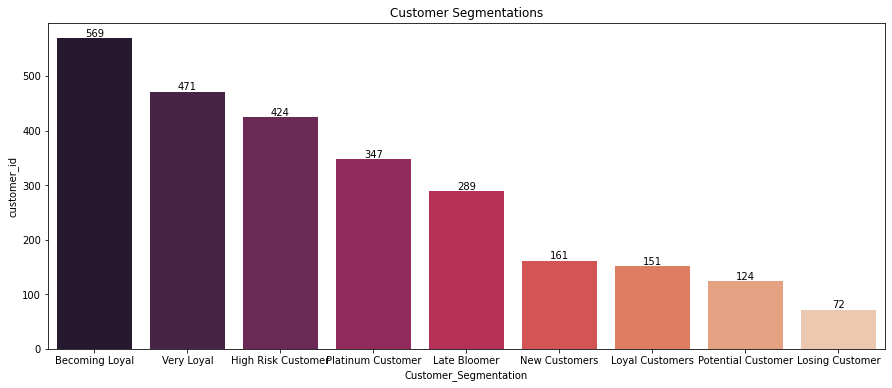

In [42]:
rfm1=rfm.groupby('Customer_Segmentation')['customer_id'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,6))
rfm1.drop([0],inplace=True)
ax=sns.barplot(data=rfm1,x='Customer_Segmentation',y='customer_id', palette="rocket", color="k", errwidth=0)
plt.title('Customer Segmentations')
for i in ax.containers:
    ax.bar_label(i,)

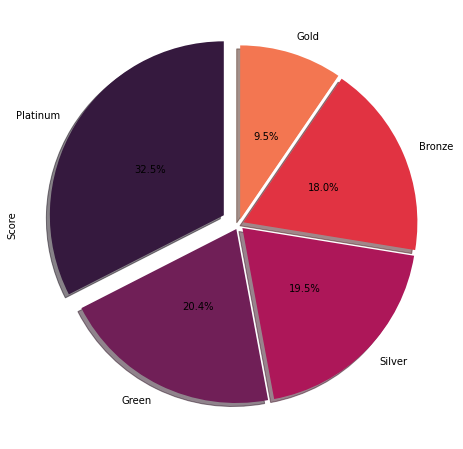

In [43]:
explodes = [0.1, 0.03, 0.03, 0.03, 0.03]
plt.figure(figsize=(20,8))
rfm['Score'].value_counts().plot.pie(subplots=True, pctdistance=0.5, 
                                      autopct='%1.1f%%',
                                      colors=sns.color_palette("rocket"),
                                      explode = explodes,shadow=True, startangle=90 );

In [44]:
new_data1.shape

(19959, 33)

In [45]:
rfm.shape

(3488, 11)

In [46]:
#new_data1=new_data1[['customer_id']].copy()
#new_data1.drop_duplicates(inplace=True)
rfm_all= pd.merge(new_data1,rfm, on=['customer_id'])
#rfm['Gender']= new_data1.groupby(by='customer_id',as_index=False)['customer_id']
#new_data=pd.merge(df2, df3, on=['customer_id'])

rfm_all.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Values,RFM_Score,Score,Customer_Segmentation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,5,5,3,553,13,Platinum,Platinum Customer
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,5,5,3,553,13,Platinum,Platinum Customer
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,5,5,3,553,13,Platinum,Platinum Customer
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,5,5,3,553,13,Platinum,Platinum Customer
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,5,5,3,553,13,Platinum,Platinum Customer


In [47]:
rfm_all.isnull().sum()

customer_id                               0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                  446
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                           

In [48]:
rfm_all=rfm_all.drop_duplicates(subset=['customer_id'])
rfm_all

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Values,RFM_Score,Score,Customer_Segmentation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,7,11,3018.09,5,5,3,553,13,Platinum,Platinum Customer
11,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,128,3,2226.26,1,1,2,112,4,Green,Lost Customer
14,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,...,195,2,220.57,1,1,1,111,3,Green,Lost Customer
16,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,...,16,6,2394.94,4,3,2,432,9,Silver,Very Loyal
22,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,...,64,5,3946.55,2,2,4,224,8,Silver,Lost Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19933,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,...,256,4,2045.84,1,1,2,112,4,Green,Lost Customer
19937,3497,Thia,O'Day,Female,73,1986-05-03,Administrative Assistant IV,Manufacturing,Affluent Customer,N,...,52,3,1648.32,3,1,2,312,6,Bronze,Late Bloomer
19940,3498,Lois,Abrahim,Female,28,1995-11-02,NaN,Manufacturing,Mass Customer,N,...,127,6,3147.33,1,3,3,133,7,Bronze,High Risk Customer
19946,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,...,51,7,4955.25,3,4,5,345,12,Platinum,Becoming Loyal


In [49]:
rfm_all.shape

(3488, 43)

In [50]:
agg_dict = {
    'customer_id': 'count' 
}
df_analysis = rfm_all.groupby(['Customer_Segmentation', 'gender']).agg(agg_dict).sort_values(by='customer_id').reset_index()
df_analysis.rename({'Customer_Segmentation':'label', 'gender':'gender', 'customer_id': 'count'}, axis=1, inplace=True)
df_analysis.head()


,label,gender,count
0,Potential Customer,Unspecified,1
1,Losing Customer,Unspecified,3
2,Loyal Customers,Unspecified,4
3,High Risk Customer,Unspecified,5
4,Late Bloomer,Unspecified,6


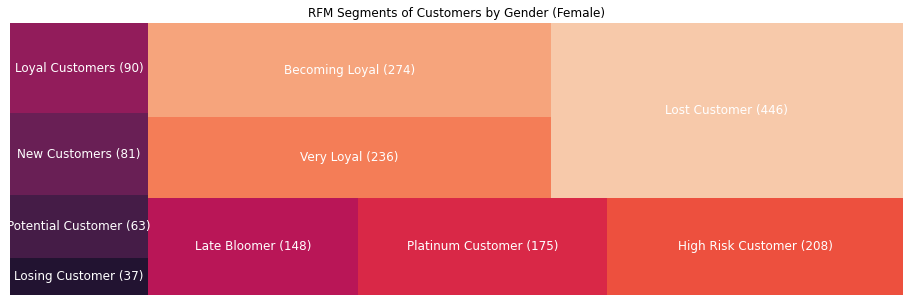

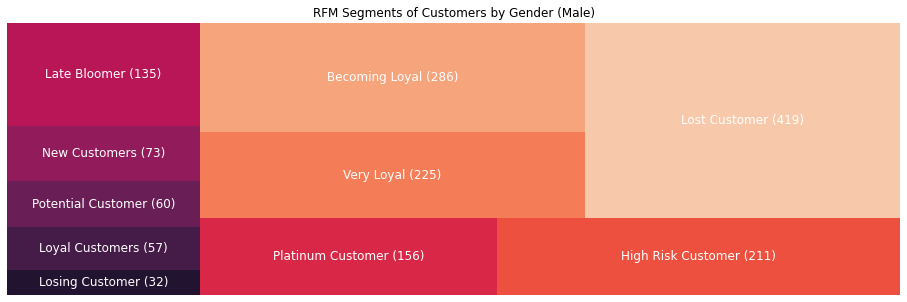

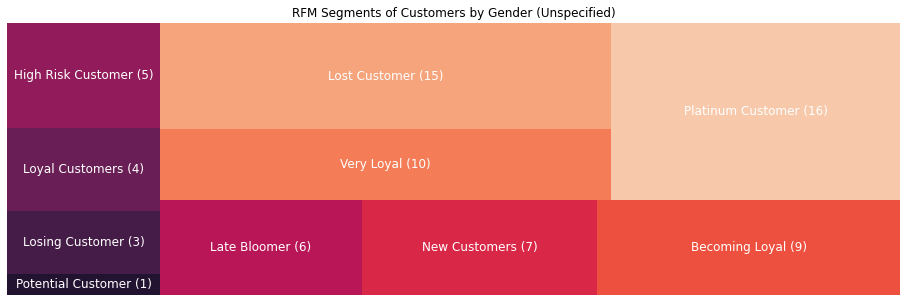

In [51]:
#female
data_m=df_analysis[df_analysis['gender']=='Female']
label = data_m['label'].to_list()
label = data_m.apply(lambda x: str(x[0]) + " (" + str(x[2]) + ")", axis=1)

fig,ax = plt.subplots(figsize=(16,5))

squarify.plot(sizes=data_m['count'], label=label, 
          text_kwargs = {'fontsize': 12, 'color': 'white'},
              color = sb.color_palette("rocket", len(data_m)))
ax.set_title('RFM Segments of Customers by Gender (Female)')
plt.axis('off')

#male
data_m=df_analysis[df_analysis['gender']=='Male']
label = data_m['label'].to_list()
label = data_m.apply(lambda x: str(x[0]) + " (" + str(x[2]) + ")", axis=1)

fig,ax = plt.subplots(figsize=(16,5))

squarify.plot(sizes=data_m['count'], label=label, 
          text_kwargs = {'fontsize': 12, 'color': 'white'},
              color = sb.color_palette("rocket", len(data_m)))
ax.set_title('RFM Segments of Customers by Gender (Male)' )
plt.axis('off')

#unspecified
data_m=df_analysis[df_analysis['gender']=='Unspecified']
label = data_m['label'].to_list()
label = data_m.apply(lambda x: str(x[0]) + " (" + str(x[2]) + ")", axis=1)

fig,ax = plt.subplots(figsize=(16,5))

squarify.plot(sizes=data_m['count'], label=label, 
          text_kwargs = {'fontsize': 12, 'color': 'white'},
              color = sb.color_palette("rocket", len(data_m)))
ax.set_title('RFM Segments of Customers by Gender (Unspecified)' )
plt.axis('off')

plt.show()

In [52]:
state_profit=rfm_all.groupby("state").agg({"profit":"sum"}).sort_values('profit').reset_index()
state_profit.rename({'state':'state','profit':'profit'}, axis=1 ,inplace=True)
state_profit

,state,profit
0,QLD,4.138752e+05
1,VIC,4.950308e+05
2,NSW,1.049737e+06


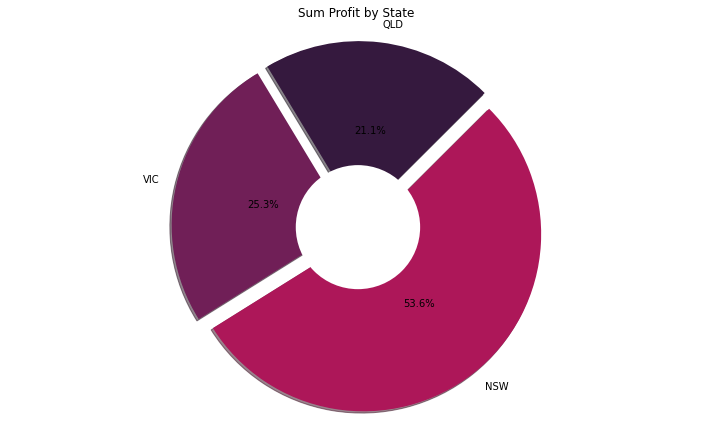

In [53]:
#Sum Profit by State

state_profit.columns=['state','profit']

fig, ax = plt.subplots(figsize=(10,6))

textprops = {"fontsize":10}
explodes = [0.1, 0.1, 0.1]

ax.pie(data=state_profit, x='profit', labels= 'state' , pctdistance=0.5, 
               autopct='%1.1f%%',
               colors=sns.color_palette("rocket"),radius = 2, 
              explode = explodes, shadow=True, startangle=45 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.tight_layout()

plt.title ("Sum Profit by State")

plt.show()

In [54]:
wealth_seg=rfm_all.groupby("wealth_segment").agg({"Recency":"sum"}).sort_values('Recency').reset_index()

wealth_seg

,wealth_segment,Recency
0,High Net Worth,52913
1,Affluent Customer,53575
2,Mass Customer,105567


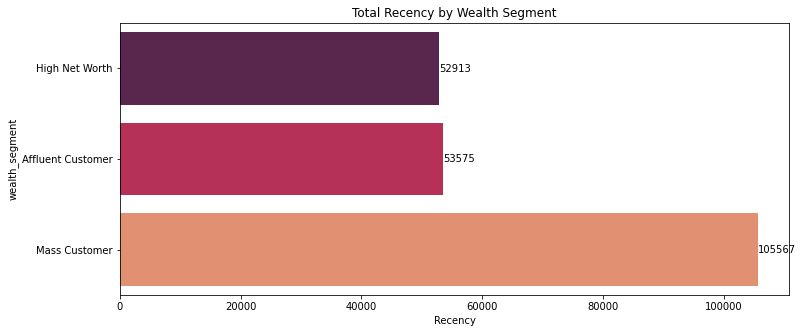

In [55]:
wealth_seg=rfm_all.groupby("wealth_segment").agg({"Recency":"sum"}).sort_values('Recency').reset_index()
plt.figure(figsize=(12,5))
#wealth_seg.drop([0],inplace=True)
ax=sns.barplot(data=wealth_seg, x='Recency',y='wealth_segment', palette="rocket")
plt.title('Total Recency by Wealth Segment')
for i in ax.containers:
    ax.bar_label(i,)

In [56]:
top_goods=rfm_all.groupby(['brand','product_line']).agg({"profit":"sum"}).sort_values('profit').reset_index()
top_goods=top_goods.nlargest(10,['profit'])
top_goods

,brand,product_line,profit
17,WeareA2B,Standard,340634.23
16,Solex,Standard,322159.37
15,OHM Cycles,Standard,230841.13
14,Giant Bicycles,Standard,217832.45
13,Trek Bicycles,Standard,213652.37
12,WeareA2B,Touring,166919.73
11,Trek Bicycles,Road,98120.66
10,Norco Bicycles,Standard,96133.78
9,Norco Bicycles,Road,59168.45
8,Solex,Touring,43676.21


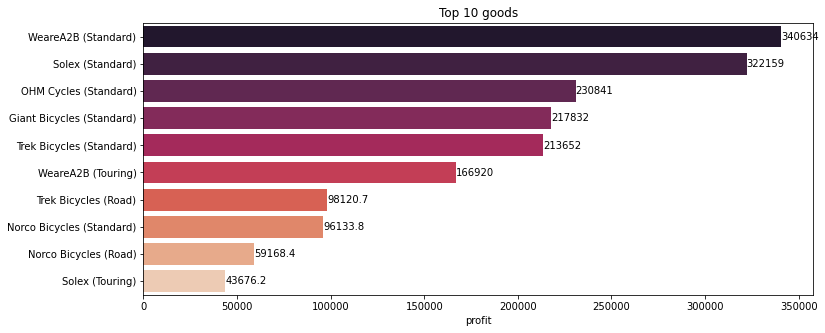

In [57]:
plt.figure(figsize=(12,5))
label = top_goods['brand'].to_list()
label = top_goods.apply(lambda x: str(x[0]) + " (" + str(x[1]) + ")", axis=1)
ax=sns.barplot(data=top_goods, x='profit',y=label, palette="rocket")
plt.title('Top 10 goods')
for i in ax.containers:
    ax.bar_label(i,)

In [58]:
agg_dict1 = {
    'customer_id': 'count',
    'Recency': 'mean'
}
df_seg = rfm_all.groupby('Customer_Segmentation').agg(agg_dict1).sort_values(by='Recency').reset_index()
df_seg.rename({'Customer_Segmentataion': 'label', 'customer_id': 'count'}, axis=1, inplace=True)
df_seg

,Customer_Segmentation,count,Recency
0,Platinum Customer,347,6.962536
1,New Customers,161,7.596273
2,Very Loyal,471,14.649682
3,Loyal Customers,151,22.456954
4,Becoming Loyal,569,33.862917
5,Late Bloomer,289,44.944637
6,Potential Customer,124,45.298387
7,Losing Customer,72,81.805556
8,High Risk Customer,424,96.485849
9,Lost Customer,880,128.921591


In [59]:
country_dict = {
   'Australia': 'Australia' ,
}

rfm_all['country'] = rfm_all['country'].apply(lambda x: country_dict[x] if x in country_dict.keys() else x)


In [60]:
import plotly.io as pio
pio.renderers.default='colab'

In [61]:
australia_state=json.load(open("australia-with-states_782.geojson","r"))

In [62]:
df=pd.read_csv("australia.csv")
df

,State,Postal,Capital,Population,Area,State Government,Density
0,Western Australia,WA,Perth,2785312,2642753,Government of Western Australia,1.05
1,Victoria,VIC,Melbourne,6613727,237657,Victorian Government,27.00
2,Tasmania,TAS,Hobart,571517,90758,Tasmanian Government,6.28
3,South Australia,SA,Adelaide,1820530,1044353,Government of South Australia,1.73
4,Queensland,QLD,Brisbane,5322058,1851736,Queensland Government,2.84
5,New South Wales,NSW,Sydney,8153584,809952,Government of New South Wales,9.99
6,Australian Capital Territory,ACT,Canberra,456652,2358,ACT Government,192.00
7,Northern Territory,NT,Darwin,250635,1419630,Northern Territory Government,0.18


In [63]:
state_id_map={}
for feature in australia_state['features']:
    feature['id']=feature['properties']['STATE_CODE']
    state_id_map[feature['properties']['STATE_NAME']]=feature['id']

In [64]:
australia_state['features'][1]['properties']

{'STATE_CODE': '2', 'STATE_NAME': 'Victoria', 'rmapshaperid': 1}

In [65]:
state_id_map

{'New South Wales': '1',
 'Victoria': '2',
 'Queensland': '3',
 'South Australia': '4',
 'Western Australia': '5',
 'Tasmania': '6',
 'Northern Territory': '7',
 'Australian Capital Territory': '8',
 'Other Territories': '9'}

In [66]:
df['id']=df['State'].apply(lambda x:state_id_map[x])
df.head()

,State,Postal,Capital,Population,Area,State Government,Density,id
0,Western Australia,WA,Perth,2785312,2642753,Government of Western Australia,1.05,5
1,Victoria,VIC,Melbourne,6613727,237657,Victorian Government,27.00,2
2,Tasmania,TAS,Hobart,571517,90758,Tasmanian Government,6.28,6
3,South Australia,SA,Adelaide,1820530,1044353,Government of South Australia,1.73,4
4,Queensland,QLD,Brisbane,5322058,1851736,Queensland Government,2.84,3


In [67]:
df.rename({ 'Postal':'state'}, axis=1, inplace=True)

In [68]:
df= pd.merge(rfm_all,df, on=['state'])


In [69]:
loc=pd.read_csv("latandlon.csv")
loc.head()

,postcode,lat,lon
0,2000,-33.86,151.21
1,2001,-33.79,151.27
2,2002,-35.97,146.41
3,2004,0.00,0.00
4,2006,-33.89,151.19


In [83]:
df= pd.merge(df,loc, on=['postcode'])

In [71]:
df=df.drop_duplicates(keep=False)
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Customer_Segmentation,State,Capital,Population,Area,State Government,Density,id,lat,lon
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Platinum Customer,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
1,1059,Chantal,Plante,Female,68,1968-02-16,Account Representative III,Entertainment,High Net Worth,N,...,Loyal Customers,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
2,2172,Emmery,Angrock,Male,6,1979-01-05,Information Systems Manager,Health,Affluent Customer,N,...,Loyal Customers,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
3,2380,Merissa,Milella,Female,44,1956-04-09,Technical Writer,Retail,Mass Customer,N,...,Becoming Loyal,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
4,2768,Forest,Knowling,Male,86,1995-09-26,Executive Secretary,Manufacturing,Mass Customer,N,...,Very Loyal,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,3423,Griselda,Bezants,Female,57,1999-12-27,Registered Nurse,Health,Affluent Customer,N,...,Lost Customer,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-37.72,145.12
3483,3425,Alister,De la Yglesia,Male,32,1986-04-05,GIS Technical Architect,Manufacturing,Mass Customer,N,...,Very Loyal,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-37.84,145.05
3484,3460,Reinhold,Barthrup,Male,22,1999-10-10,Actuary,Financial Services,Mass Customer,N,...,Becoming Loyal,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-37.91,145.06
3485,3462,Jehanna,Sparhawk,Female,96,1957-03-03,Registered Nurse,Health,High Net Worth,N,...,Very Loyal,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-36.22,145.34


In [72]:
ex=df.iloc[:,[13,50,51]]
ex

,postcode,lat,lon
0,2016,-33.89,151.20
1,2016,-33.89,151.20
2,2016,-33.89,151.20
3,2016,-33.89,151.20
4,2016,-33.89,151.20
...,...,...,...
3482,3094,-37.72,145.12
3483,3122,-37.84,145.05
3484,3051,-37.91,145.06
3485,3634,-36.22,145.34


In [73]:
df.to_excel('df.xlsx',index=False)

In [88]:
df=pd.read_excel('df.xlsx')
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Customer_Segmentation,State,Capital,Population,Area,State Government,Density,id,lat,lon
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Platinum Customer,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
1,1059,Chantal,Plante,Female,68,1968-02-16,Account Representative III,Entertainment,High Net Worth,N,...,Loyal Customers,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
2,2172,Emmery,Angrock,Male,6,1979-01-05,Information Systems Manager,Health,Affluent Customer,N,...,Loyal Customers,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
3,2380,Merissa,Milella,Female,44,1956-04-09,Technical Writer,Retail,Mass Customer,N,...,Becoming Loyal,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
4,2768,Forest,Knowling,Male,86,1995-09-26,Executive Secretary,Manufacturing,Mass Customer,N,...,Very Loyal,New South Wales,Sydney,8153584,809952,Government of New South Wales,9.99,1,-33.89,151.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,3423,Griselda,Bezants,Female,57,1999-12-27,Registered Nurse,Health,Affluent Customer,N,...,Lost Customer,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-37.72,145.12
3483,3425,Alister,De la Yglesia,Male,32,1986-04-05,GIS Technical Architect,Manufacturing,Mass Customer,N,...,Very Loyal,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-37.84,145.05
3484,3460,Reinhold,Barthrup,Male,22,1999-10-10,Actuary,Financial Services,Mass Customer,N,...,Becoming Loyal,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-37.91,145.06
3485,3462,Jehanna,Sparhawk,Female,96,1957-03-03,Registered Nurse,Health,High Net Worth,N,...,Very Loyal,Victoria,Melbourne,6613727,237657,Victorian Government,27.00,2,-36.22,145.34


In [89]:
import plotly.graph_objects as go

In [ ]:
"""
#choropleth_mapbox

geojson = px.data.election_geojson()
fig=px.choropleth_mapbox(df, locations='id',
                      geojson=australia_state, 
                      color_continuous_scale="purpor",
                      hover_name='State',    
                      hover_data=(['gender', 'Score','RFM_Score']),
                      mapbox_style='carto-positron',
                      labels = "rfm score scale",
                      center={'lat':-28.5575,'lon':153.5575},
                      color_continuous_midpoint=0,
                      zoom=3)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

"""

In [102]:
# Creating and visualizing a scatter plot on Mapbox
fig = px.scatter_mapbox(df, lat="lat", lon="lon",
                  color="RFM_Score",
                  color_discrete_sequence="fuchsia", 
                  color_continuous_scale=px.colors.cyclical.Twilight,
                  mapbox_style='open-street-map',
                  size_max=8, zoom=3, hover_name='RFM_Score', 
                  hover_data = ['RFM_Score', 'Score', 'Customer_Segmentation','State'], 
                  title = 'RFM Score by State',
                  size=df['RFM_Score']
                  )
fig.show()

**Identifying new target customers**

In [91]:
#new_customer segmentation
df1

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.48,0.6000,0.750000,0.637500,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.63,0.6300,0.787500,0.669375,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.49,0.4900,0.490000,0.490000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.40,0.5000,0.500000,0.500000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.49,0.4900,0.612500,0.612500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.99,0.9900,0.990000,0.990000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.40,0.4000,0.500000,0.425000,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.94,1.1750,1.175000,1.175000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.49,0.6125,0.612500,0.520625,997,997,0.357000


In [92]:
df1.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.754110,0.84772,0.952993,0.880017,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.206502,0.25360,0.302467,0.288855,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.40000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.580000,0.64000,0.720000,0.655813,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.84000,0.925000,0.860000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.940000,1.03750,1.178125,1.080938,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.37500,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [93]:
df1.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [94]:
#adding 'customer_id' to dataset from 1 to 1000
df1['customer_id']=df1.index+1
df1.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,customer_id
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.48,0.60,0.7500,0.637500,1,1,1.718750,1
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.63,0.63,0.7875,0.669375,1,1,1.718750,2
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.49,0.49,0.4900,0.490000,1,1,1.718750,3
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.40,0.50,0.5000,0.500000,4,4,1.703125,4
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.49,0.49,0.6125,0.612500,4,4,1.703125,5


In [96]:
#rearrange the 'customer_id' column
clist=list(df1.columns)
clist_new=clist[-1:]+clist[:-1]
df1=df1[clist_new]

In [97]:
df1.shape

(1000, 24)

In [98]:
df1['DOB'] = pd.to_datetime(df1['DOB'], errors='coerce')
df1['DOB'] = df1['DOB'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df1['DOB'] = df1['DOB'].fillna(df1['DOB'].mode())
#new_data1['product_first_sold_date'] = np.array(new_data1['product_first_sold_date'], dtype='float64')
#df1['DOB']=pd.to_datetime(df1['DOB'],unit='ns')

In [99]:
date1 = datetime.now().strftime(format='%x')
df1['Age'] = df1['DOB'].apply(lambda x: len(pd.date_range(start = x, end = date1, freq = 'Y')) if str(x) else None)
df1 = df1[df1.Age < 100]

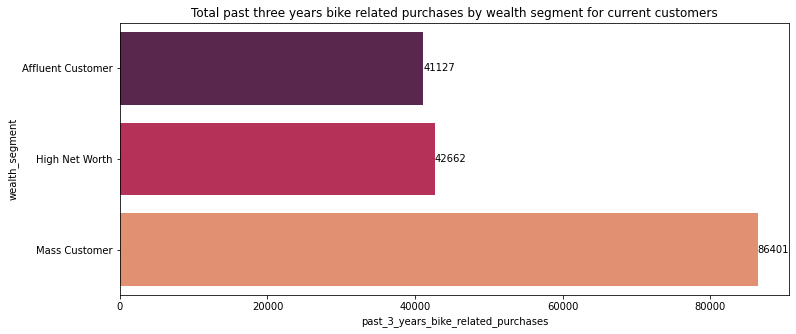

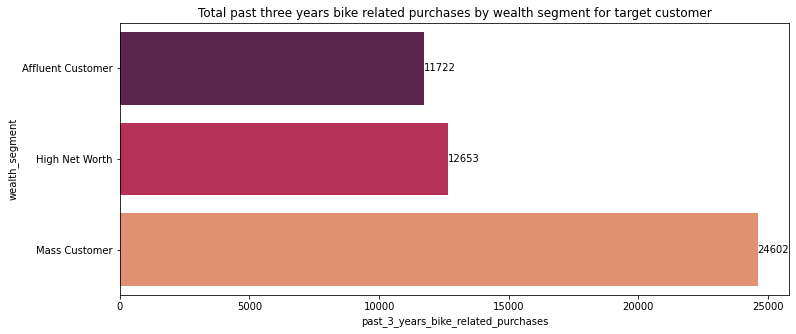

In [100]:
#current customers
wealth_seg=rfm_all.groupby("wealth_segment").agg({"past_3_years_bike_related_purchases":"sum"}).sort_values('past_3_years_bike_related_purchases').reset_index()
plt.figure(figsize=(12,5))
wealth_seg.drop([0])
ax=sns.barplot(data=wealth_seg, x='past_3_years_bike_related_purchases',y='wealth_segment', palette="rocket", color="k", errwidth=0)
plt.title('Total past three years bike related purchases by wealth segment for current customers')
for i in ax.containers:
    ax.bar_label(i,)

#talent customers
wealth_seg=df1.groupby("wealth_segment").agg({"past_3_years_bike_related_purchases":"sum"}).sort_values('past_3_years_bike_related_purchases').reset_index()
plt.figure(figsize=(12,5))
wealth_seg.drop([1])
ax=sns.barplot(data=wealth_seg, x='past_3_years_bike_related_purchases',y='wealth_segment', palette="rocket", color="k", errwidth=0)
plt.title('Total past three years bike related purchases by wealth segment for target customer')
for i in ax.containers:
    ax.bar_label(i,)
